# Adam Dahill
# 5/12/2022

# Objective: Predicting an MLB teams success (wins in a season), based on multiple offensive and defensive statistics including fan attendance


# Step 1: Exploratory Data Aanalysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Reading dataset from local drive
from google.colab import files
upload = files.upload()

Saving Teams.csv to Teams.csv


In [ ]:
# Uploading dataset
import pandas as pd
df = pd.read_csv('Teams.csv')

In [ ]:
# Learning dataset 
df.head(5)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2805 non-null   int64  
 1   lgID            2755 non-null   object 
 2   teamID          2805 non-null   object 
 3   franchID        2805 non-null   object 
 4   divID           1288 non-null   object 
 5   Rank            2805 non-null   int64  
 6   G               2805 non-null   int64  
 7   Ghome           2406 non-null   float64
 8   W               2805 non-null   int64  
 9   L               2805 non-null   int64  
 10  DivWin          1260 non-null   object 
 11  WCWin           624 non-null    object 
 12  LgWin           2777 non-null   object 
 13  WSWin           2448 non-null   object 
 14  R               2805 non-null   int64  
 15  AB              2805 non-null   int64  
 16  H               2805 non-null   int64  
 17  2B              2805 non-null   i

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,...,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF
count,2805.000000,2805.000000,2805.00000,2406.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000,2.526000e+03,2805.000000,2805.000000
mean,1955.036720,4.107308,150.34795,78.465919,74.749020,74.749020,681.945811,5142.492335,1346.273440,227.624955,...,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519,1.344346e+06,100.199643,100.225668
std,41.519083,2.323414,23.22725,4.698684,17.640402,17.378079,135.738244,750.551691,219.891603,58.692602,...,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224,9.469316e+05,4.882215,4.814985
min,1871.000000,1.000000,6.00000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000,6.088000e+03,60.000000,60.000000
25%,1919.000000,2.000000,153.00000,77.000000,66.000000,65.000000,613.000000,5127.000000,1299.000000,193.000000,...,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000,5.287162e+05,97.000000,97.000000
50%,1963.000000,4.000000,157.00000,81.000000,77.000000,76.000000,690.000000,5389.000000,1393.000000,231.000000,...,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000,1.140348e+06,100.000000,100.000000
75%,1992.000000,6.000000,162.00000,81.000000,87.000000,87.000000,763.000000,5517.000000,1467.000000,270.000000,...,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000,2.014687e+06,103.000000,103.000000
max,2015.000000,13.000000,165.00000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000


In [ ]:
# Creating dataframe for numeric and categorical features separately 
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [ ]:
# Listing columns
df.columns.values.tolist()

['yearID',
 'lgID',
 'teamID',
 'franchID',
 'divID',
 'Rank',
 'G',
 'Ghome',
 'W',
 'L',
 'DivWin',
 'WCWin',
 'LgWin',
 'WSWin',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'CS',
 'HBP',
 'SF',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'HA',
 'HRA',
 'BBA',
 'SOA',
 'E',
 'DP',
 'FP',
 'name',
 'park',
 'attendance',
 'BPF',
 'PPF',
 'teamIDBR',
 'teamIDlahman45',
 'teamIDretro']

In [ ]:
## Finding out the feature names of the continuous and categorical var 
numeric_df.columns
categorical_df.columns

Index(['lgID', 'teamID', 'franchID', 'divID', 'DivWin', 'WCWin', 'LgWin',
       'WSWin', 'name', 'park', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [ ]:
## Finding out the dimension of numeric_df and categorical_df
numeric_df.shape
categorical_df.shape

(2805, 13)

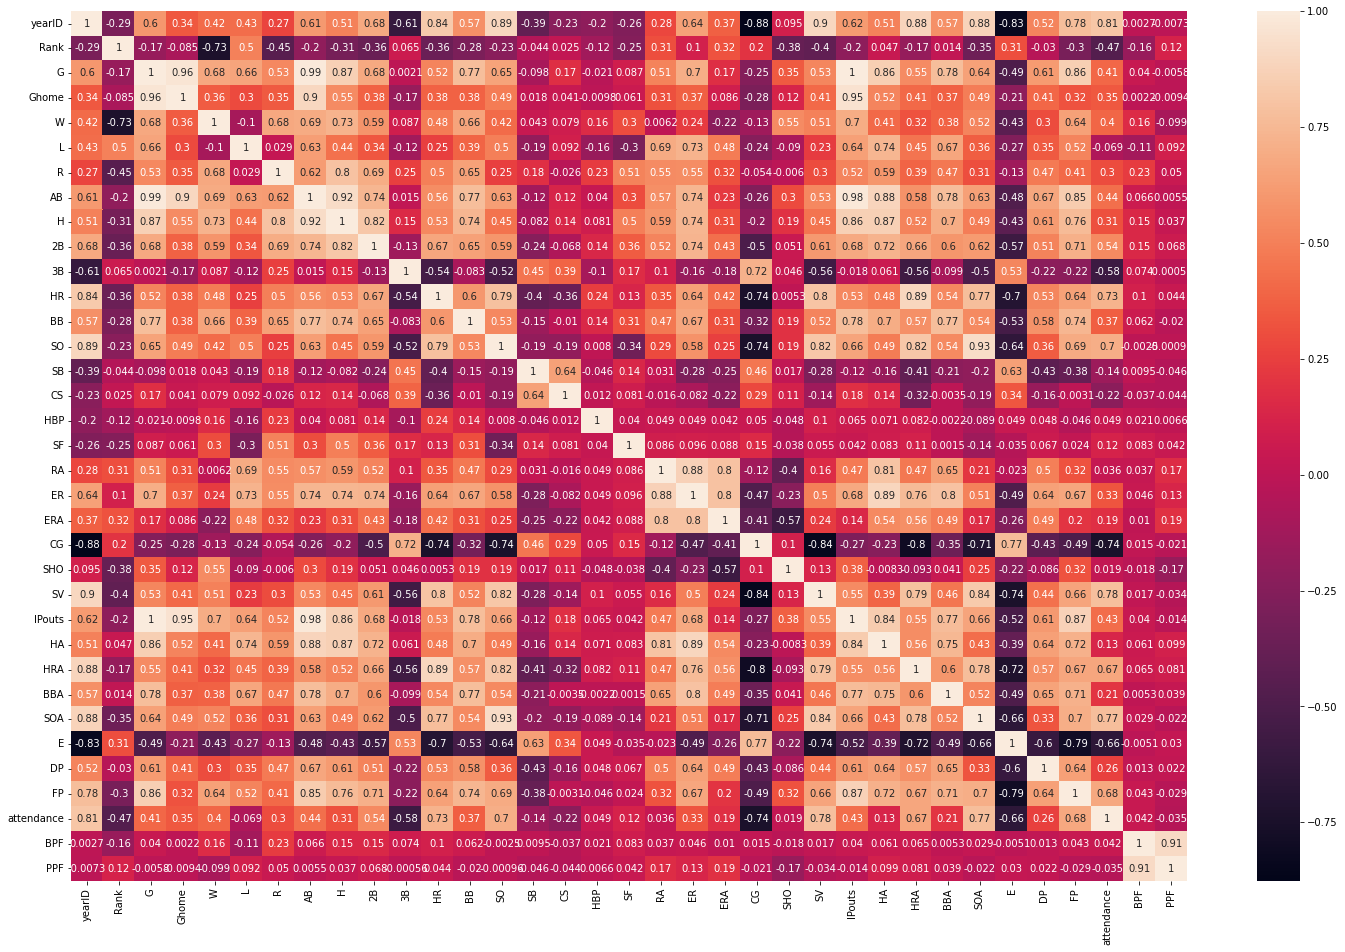

In [ ]:
## Correlation matrix
correlation = numeric_df.corr()
plt.figure(figsize=(25,16))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
#List of unique hits per a team
np.unique(numeric_df['H'], return_counts=True)

(array([  33,   49,   81,   88,   91,   93,  105,  126,  138,  178,  194,
         204,  223,  235,  272,  274,  278,  304,  305,  323,  325,  328,
         329,  332,  370,  374,  375,  384,  403,  408,  410,  426,  434,
         435,  494,  497,  531,  535,  542,  545,  552,  555,  557,  587,
         588,  592,  604,  618,  622,  626,  629,  633,  637,  641,  642,
         645,  646,  649,  659,  660,  663,  666,  668,  669,  673,  677,
         678,  681,  683,  689,  690,  697,  699,  700,  709,  711,  716,
         723,  724,  726,  728,  730,  733,  742,  747,  754,  755,  769,
         776,  777,  779,  780,  781,  793,  795,  796,  797,  808,  810,
         813,  820,  823,  825,  829,  837,  838,  845,  852,  854,  856,
         858,  859,  868,  870,  873,  876,  883,  884,  886,  889,  890,
         891,  892,  896,  900,  901,  910,  915,  917,  918,  920,  921,
         922,  926,  928,  930,  931,  934,  936,  940,  941,  944,  945,
         948,  950,  952,  955,  961, 

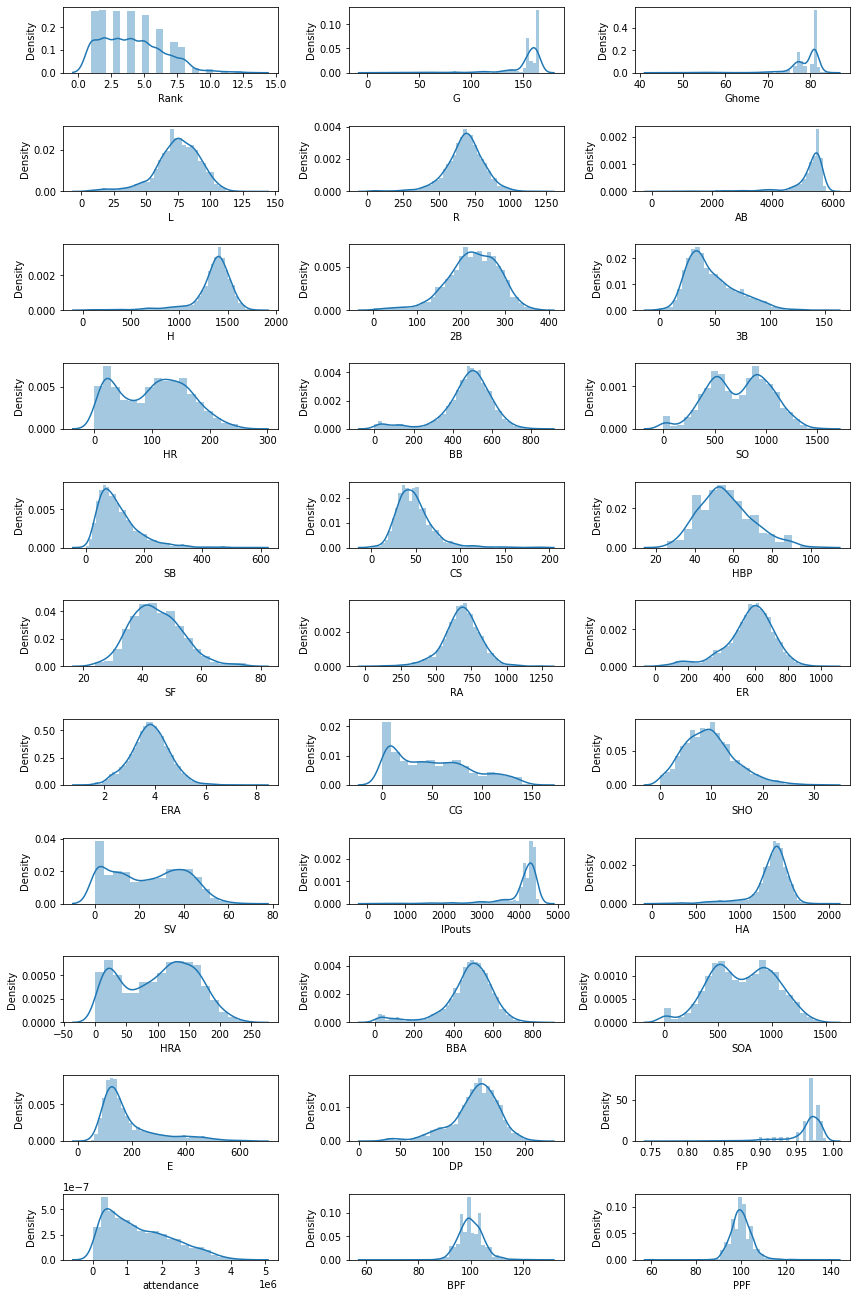

In [ ]:
## Univariate Data Analysis
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['W', 'yearID']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature])
        plt.tight_layout()

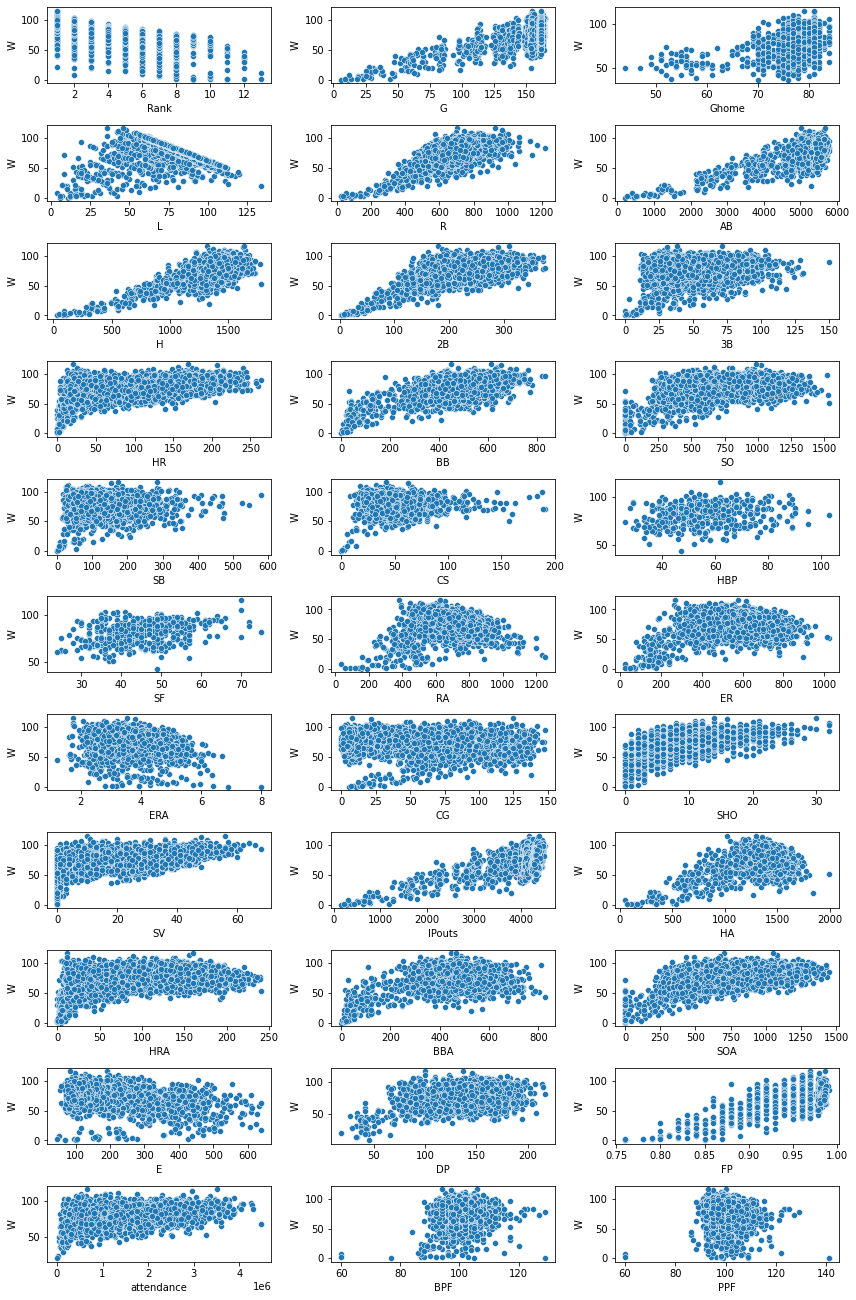

In [ ]:
## Using scatterplots to find correlations between each univariate variable and the target
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['W', 'yearID']:
        i+=1
        plt.subplot(13, 3, i)
        ## fill out the misssing code here 
        sns.scatterplot(numeric_df[feature], numeric_df['W'])
        plt.tight_layout()

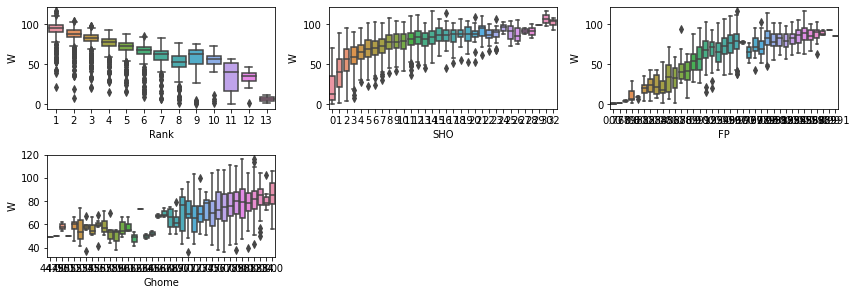

In [ ]:
## Using boxplots to find relationship between categorical variables and target
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['Rank', 'SHO', 'FP', 'Ghome']):
    plt.subplot(6, 3, i+1)
    ## Which graph should I use
    ## fill up the code below
    sns.boxplot(df[feature], numeric_df['W'])
    plt.tight_layout()

## What can you learn from the graph?
## 1. 'FP' (Fielding Percentage): Positively correlated with Wins
## 2. 'Rank' (as expected) : Positive correlation with Wins
## 3. 'Ghome' (Home games) : Positively correlated with Wins

In [ ]:
# Converting the year related feature into number of years
for feature in ['yearID']:
    df[feature] = 2022 - df[feature]

In [ ]:
### Find the categorical variable names
categorical_df.columns.sort_values()

Index(['DivWin', 'LgWin', 'WCWin', 'WSWin', 'divID', 'franchID', 'lgID',
       'name', 'park', 'teamID', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'],
      dtype='object')

# Step 2: Feature Engineering

In [1]:
## Removing non-useful features from dataset
## Everything but R, AB, H, 2B, 3B, 'HR', BB', 'SO','SB', HBP, ER, ERA, RA, E, attendance
removeFeats = ['yearID',
 'lgID',
 'teamID',
 'franchID',
 'divID',
 'Rank',
 'G',
 'Ghome',
 'L',
 'DivWin',
 'WCWin',
 'LgWin',
 'WSWin',
 'CS',
 'SF',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'HA',
 'HRA',
 'BBA',
 'SOA',
 'DP',
 'FP',
 'name',
 'park',
 'BPF',
 'PPF',
 'teamIDBR',
 'teamIDlahman45',
 'teamIDretro']



In [ ]:
## Checking % of null values
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

In [ ]:
df.info()

In [ ]:
df.columns.values.tolist()

In [ ]:
# Since Attendance has only 10% data missing, dropping rows with NULL values in the column
df = df[-df['attendance'].isnull()]

# Dropping HBP due to 83% null values
df.drop(['HBP'], axis=1, inplace=True)

df.shape

In [ ]:
# Dropping rows with null values in 'SO', for very low missing value count
print(df['SO'].isnull().sum())
df.dropna(subset= ['SO'], inplace=True)


In [ ]:
# Dropping rows with null values in 'SB', for very low missing value count
print(df['SB'].isnull().sum())
df.dropna(subset= ['SB'], inplace=True)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
## Obtain the feature matrix
X = df.drop('W', axis = 1)

In [ ]:
X.head()

In [ ]:
## Creating target variable dataframe
y = df['W']
y.head()

In [ ]:
## Check if y is a skewed distribution
sns.distplot(y)
print(y.skew())

In [ ]:
## Log transformation to remove skewness
y_bc = np.log(y)



In [ ]:
## Drawing the histogram of y after the log transformation
sns.distplot(y_bc)

In [ ]:
## Splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_bc, test_size=0.2, shuffle=True, random_state=100)


In [ ]:
X_train.shape

In [ ]:
X_train.head()

In [ ]:
## Checking percentage of outliers in each continuous numeric feature
outliers_percentage={}
numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
cols = ['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','E','attendance']

for feature in numeric_df.columns:
    if feature not in cols:
        IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
        outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

In [ ]:
## Outlier Treatment
for feature, percent in outliers_percentage.items():
    if percent > 0:
        ### find the IQR of each feature (1 point)
        IQR = X_train[feature].quartile(.75)-X_Train[feature].quartile(.25)
     
        ### find the maximum upper fence point of a box plot, which is 
        ### the 75% quantile + 1.5*IQR (1 point)
        max_value = X_train[feature].quartile(.75)+1.5*IQR

        ### find the minimum upper fence point of a box plot, which is 
        ### the 75% quantile - 1.5*IQR (1 point)
        min_value = X_train[feature].quartile(.25)-1.5*IQR

        ## replace all the observations of feature that is larger than 
        ## max_value with max_value in both training set and testing set (1 point)
        X_train[feature][X_train[feature]>max_value] = max_value
        X_test[feature][X_train[feature]>max_value] = max_value

        ## replace all the observations of feature that is larger than 
        ## min_value with min_value in both training set and testing set (1 point)
        X_train[feature][X_train[feature]>min_value] = min_value
        X_test[feature][X_train[feature]>min_value] = min_value

        
        print(feature, IQR, min_value, max_value)

In [ ]:
## Checking Null values
def null_values(dataf):
    for feat in dataf.columns:
        if dataf[feat].isnull().any():
            print(feat+" : "+str(dataf[feat].isnull().sum()))

In [ ]:
## Apply null_values function to X_train and X_test 
null_values(X_train)
print("-----------")
null_values(X_test)

In [ ]:
X_train.head()


In [ ]:
X_test.head()

In [ ]:
## Scaling the features
sscaler = StandardScaler()

## Using Fit() trains the model and adjust the weights according to the data values
sscaler.fit(X_train)

## Using transform function because it's an effective way to transform data during feature extraction
X_train_sc = pd.DataFrame(data=sscaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(data=sscaler.transform(X_test), columns=X_test.columns)

In [ ]:
X_train_sc.head()

In [ ]:
X_test_sc.head()

# Step 3: Model Fitting, Parameter Tuning and Model Evaluation

In [ ]:
## Saving the cleaned datast X_train_sc, X_test_sc, y_train and y_test to local folder
from google.colab import files
X_train_sc.to_csv("X_train_sc.csv")
X_test_sc.to_csv("X_test_sc.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")
files.download("X_train_sc.csv")
files.download("X_test_sc.csv")
files.download("y_train.csv")
files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Uploading the cleaned dataset at pandas dataframes
import pandas as pd
X_train = pd.read_csv('X_train_sc.csv')
X_test = pd.read_csv('X_test_sc.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
## Fitting a Lasso Regression
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

R2 score (train) :  0.4754
R2 score (test) :  0.4737
RMSE (train) :  129.0019
RMSE (test) :  127.7019


In [ ]:
print(y_train_pred)
print(y_train)
print(y_train_pred[:, 1])
print(y_train.iloc[:,1])

[[2239.62675816    4.32895086]
 [ 201.79376746    4.33925218]
 [2033.96929458    4.33226384]
 ...
 [ 225.35656864    4.33924044]
 [2330.15685235    4.33621373]
 [1879.54936477    4.33310213]]
      Unnamed: 0         W
0           2156  3.850148
1            317  4.262680
2           2000  4.343805
3           2513  4.330733
4           1615  4.488636
...          ...       ...
1919         749  4.442651
1920        2329  4.442651
1921         342  4.077537
1922        2258  4.369448
1923        1943  4.276666

[1924 rows x 2 columns]
[4.32895086 4.33925218 4.33226384 ... 4.33924044 4.33621373 4.33310213]
0       3.850148
1       4.262680
2       4.343805
3       4.330733
4       4.488636
          ...   
1919    4.442651
1920    4.442651
1921    4.077537
1922    4.369448
1923    4.276666
Name: W, Length: 1924, dtype: float64


In [ ]:
## Fixing the Model evaluation
y_train = y_train.iloc[:, 1]
y_train_pred = y_train_pred[:, 1]
y_test = y_test.iloc[:, 1]
y_test_pred = y_test_pred[:, 1]

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train,y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))



R2 score (train) :  0.0168
R2 score (test) :  0.0113
RMSE (train) :  0.1929
RMSE (test) :  0.1768


In [ ]:
## Fitting lasso with alpha=0.00125
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.00125)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

## Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))



R2 score (train) :  0.9022
R2 score (test) :  0.881
RMSE (train) :  0.0609
RMSE (test) :  0.0613


In [ ]:
## Fitting lasso with alpha=0.5
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred =  lasso.predict(X_test)

### Model evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))



R2 score (train) :  0.0
R2 score (test) :  -0.0051
RMSE (train) :  0.1946
RMSE (test) :  0.1782


In [ ]:
### Hold-out cross-validation

def ModelTrainAndEvaluaion(alphaValues, xtrain, xtest, ytrain, ytest):
    """
    Parameters: 

    -alphaValues: a vector of different tuning parameter values
    -xtrain: the training dataset
    -xtest: the testing set
    -ytrain: target var for training set
    -ytest: target var for testing set

    Output:
    returns a dictionary that stores the r2, rmse of the training and
    testing set respectively. Choose a dictionary data structure to
    save the result
    """

    ## Defining Data Structures to store results, and getting the number of different values
    num = len(alphaValues)
    r2train = np.zeros(num)
    r2test = np.zeros(num)
    rmsetrain = np.zeros(num)
    rmsetest = np.zeros(num)

    
    #### Model fitting and evaluation with diffferent tuning parameters
  
    for i in range(num):
      ## Model fitting
      lasso = Lasso(alpha=alphaValues[i])
      lasso.fit(X_train, y_train)

      y_train_pred = lasso.predict(X_train)
      y_test_pred = lasso.predict(X_test)

      ## Model evaluation
      r2train[i] = round(r2_score(y_train,y_train_pred),4)
      r2test[i] = round(r2_score(y_test,y_test_pred),4)
      rmsetrain [i] = round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4)
      rmsetest[i] = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4)
    
    result = dict()
    result['r2train'] = r2train
    result['r2test'] = r2test
    result['rmsetrain'] = rmsetrain
    result['rmsetest'] = rmsetest
    return result

### Example usage of this function
alphaValues = [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]
result = ModelTrainAndEvaluaion(alphaValues, X_train, X_test, y_train, y_test)
print(result['r2test'])
print(result['rmsetest'])

[ 0.8847  0.8845  0.8832  0.8818  0.881   0.881   0.8812  0.8805  0.8744
  0.0113 -0.0051]
[0.0604 0.0604 0.0608 0.0611 0.0613 0.0613 0.0613 0.0614 0.063  0.1768
 0.1782]


In [ ]:
## Model selection: How to choose the best tunning parameter?
import numpy as np
rmseValues = result['rmsetest']
## Finding the minimum value of the rmse
print(np.min(result['rmsetest']))

## Finding the index of the minimum rmse values 
minInd = np.argmin(rmseValues, axis=0)

## Using this index and find the corresponding alpha value
bestAlpha = alphaValues[minInd]
print(bestAlpha)


0.0604
0.0001


In [ ]:
### K fold cross-validation
folds = KFold(n_splits = 5)
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}

model = Lasso()
### GridSearch and Model training
model_cv = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              scoring= 'r2', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1) 
### use model_cv to fit with X_train and y_train           
model_cv.fit(X_train, y_train)

### get the best alpha
alpha = model_cv.best_params_["alpha"]
print("Optimum alpha for %s is %f" %(model, alpha))

### get the best estimator from model_cv and set it as final_model
final_model = model_cv.best_estimator_
final_model.fit(X_train, y_train)

### use final_model to fit with X_train and y_train
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

## Model Prediction using X_train and X_test respectively
# Model Evaluation
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

## save the cross validation results into a data frame
cvResults = pd.DataFrame(model_cv.cv_results_)
cvResults.head(5)

cvResults['param_alpha'] = cvResults['param_alpha'].astype('float32')
print(cvResults)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.000100
R2 score (train) :  0.9076
R2 score (test) :  0.8847
RMSE (train) :  0.0592
RMSE (test) :  0.0604
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0        0.017548      0.001779         0.003136        0.000209      0.00010   
1        0.022745      0.006429         0.003089        0.000220      0.00025   
2        0.019180      0.007464         0.003054        0.000070      0.00050   
3        0.024448      0.003439         0.003122        0.000329      0.00065   
4        0.010022      0.004664         0.002759        0.000094      0.00100   
5        0.014086      0.005265         0.003814        0.001842      0.00125   
6        0.007835      0.000304         0.002825        0.000206      0.00250   
7        0.007390      0.000501         0.002622        0.000101      0.00500   
8        0.015108      0.003132         0.004234        0.001779      0.01

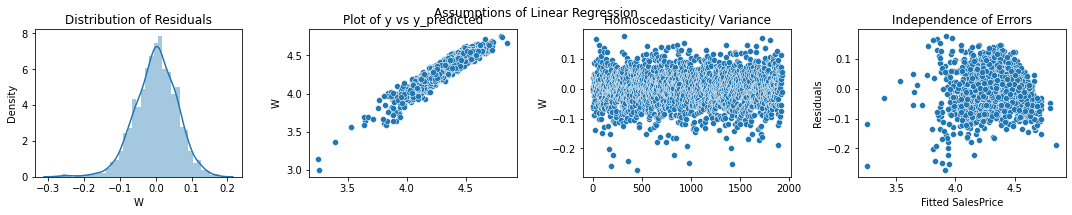

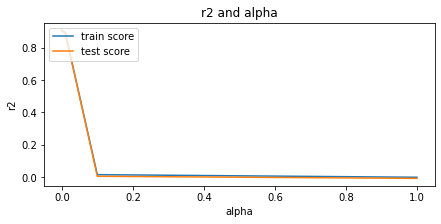

In [ ]:
## Model Assumptions and Diagnostics
fig, axes = plt.subplots(1, 4, figsize=(15,3))
    
## Check if the distribution of the residual looks like a Normal distribution (bell shape)
fig.suptitle('Assumptions of Linear Regression')
sns.distplot( y_train-y_train_pred, ax = axes[0])
axes[0].set_title('Distribution of Residuals')
    
### Check the linearity assumption using the observed-vs-predicted values
sns.scatterplot( y_train_pred, y_train, ax = axes[1])  
axes[1].set_title('Plot of y vs y_predicted')

### Check equal variances
sns.scatterplot( X_train.index, (y_train-y_train_pred),ax = axes[2])
axes[2].set_title('Homoscedasticity/ Variance')
plt.tight_layout()

### Check independence of errors
sns.scatterplot( y_train_pred, (y_train-y_train_pred),ax = axes[3])
axes[3].set_title('Independence of Errors')
plt.ylabel("Residuals")
plt.xlabel("Fitted SalesPrice")
plt.tight_layout()

# plotting
fig = plt.figure(figsize=(7,3))
plt.plot(cvResults['param_alpha'], cvResults['mean_train_score'])

plt.plot(cvResults['param_alpha'], cvResults['mean_test_score'])



plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Optimum alpha for Lasso() is 0.000100
R2 score (train) :  0.9076
R2 score (test) :  0.8847
RMSE (train) :  0.0592
RMSE (test) :  0.0604


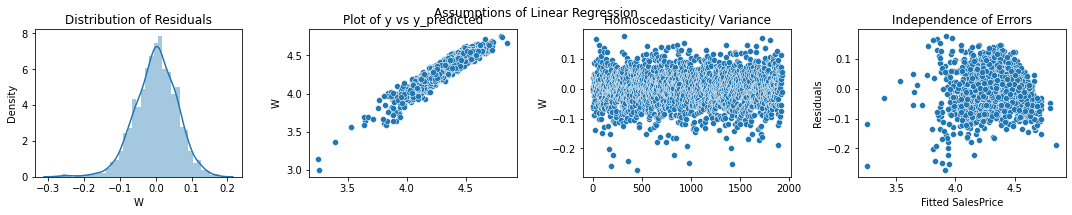

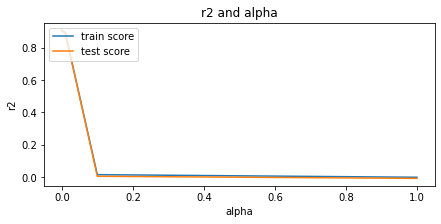

In [ ]:
## Combine the K-fold cross validation and model diagnostics into a function
def ModelTrainAndEvaluaion(model, params, xtrain, xtest, ytrain, ytest):
  model_cv = GridSearchCV(estimator = model, 
                          param_grid = params, 
                          scoring= 'r2', 
                          cv = folds, 
                          return_train_score=True,
                          verbose = 1) 
  ## use model_cv to fit with X_train and y_train           
  model_cv.fit(X_train, y_train)

  ## get the best alpha
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))

  ## get the best estimator from model_cv and set it as final_model
  final_model = model_cv.best_estimator_
  final_model.fit(X_train, y_train)

  ## use final_model to fit with X_train and y_train
  y_train_pred = final_model.predict(xtrain)
  y_test_pred = final_model.predict(xtest)

  ## Model Prediction using X_train and X_test respectively
  # Model Evaluation
  print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
  print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
  print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
  print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))

  ### Model Assumptions and Diagnostics
  fig, axes = plt.subplots(1, 4, figsize=(15,3))
      
  ## Check if the distribution of the residual looks like a Normal distribution
  ## (bell shape)
  fig.suptitle('Assumptions of Linear Regression')
  sns.distplot( y_train-y_train_pred, ax = axes[0])
  axes[0].set_title('Distribution of Residuals')
      
  ### Check the linearity assumption using the observed-vs-predicted values
  sns.scatterplot( y_train_pred, y_train, ax = axes[1])  
  axes[1].set_title('Plot of y vs y_predicted')

  ### Check equal variances
  sns.scatterplot( X_train.index, (y_train-y_train_pred),ax = axes[2])
  axes[2].set_title('Homoscedasticity/ Variance')
  plt.tight_layout()

  ### Check independence of errors
  sns.scatterplot( y_train_pred, (y_train-y_train_pred),ax = axes[3])
  axes[3].set_title('Independence of Errors')
  plt.ylabel("Residuals")
  plt.xlabel("Fitted SalesPrice")
  plt.tight_layout()

  # plotting
  fig = plt.figure(figsize=(7,3))
  ## use plt.plot to draw cvResults['param_alpha'] as x axis
  ## and use cvResults['mean_train_score'] as y axis
  plt.plot(cvResults['param_alpha'], cvResults['mean_train_score'])

  ## use plt.plot to draw cvResults['param_alpha'] as x axis
  ## and use cvResults['mean_train_score'] as y axis
  plt.plot(cvResults['param_alpha'], cvResults['mean_test_score'])

  plt.xlabel('alpha')
  plt.ylabel('r2')

  plt.title("r2 and alpha")
  plt.legend(['train score', 'test score'], loc='upper left')
  plt.show()
  return final_model

## Using this function
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}
finalModel = ModelTrainAndEvaluaion(Lasso(), params=params, 
                                    xtrain=X_train, xtest=X_test, ytrain=y_train, ytest=y_test)
